In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('Iris.csv',index_col=0)

In [4]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.4+ KB


there are 150 entries in our data, 4 numerical and 1 object type column

In [46]:
df.nunique()#Species column includes 3 unique values 

petalsize    101
sepalsize    109
Species        3
dtype: int64

In [7]:
df.describe(include='all')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-virginica
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


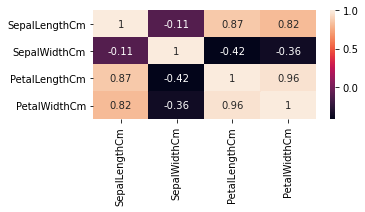

In [8]:
plt.figure(figsize=(5,2)) 
sns.heatmap(df.corr(),annot=True)
plt.show()
#Our data seems to be correlated to each other

In [9]:
#Feature engineering 2 new columns to replace the existing columns to obtain best and accurate result 
s_size=df['SepalLengthCm']*df['SepalWidthCm']
p_size=df['PetalLengthCm']*df['PetalWidthCm']
df.insert(0,'sepal_size',s_size)
df.insert(1,'petal_size',p_size)


In [10]:
df.head(1)#checking the new columns

,sepal_size,petal_size,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,,,
1,17.85,0.28,5.1,3.5,1.4,0.2,Iris-setosa


In [11]:
#Dropping unnecesary columns
df.drop(['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'],axis=1,inplace=True)

In [12]:
df.sample(1)#checking the dataset

,sepal_size,petal_size,Species
Id,,,
52,20.48,6.75,Iris-versicolor


# Handling Categorical data- Species

In [47]:
#importing labelencoder as theres only one object column which needs to be handled
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()#creating an object 
df['Species']=le.fit_transform(df['Species'])#transforming object to int value
df.sample(5)#checking

,petalsize,sepalsize,Species
Id,,,
127,8.64,17.36,2
128,8.82,18.30,2
48,0.28,14.72,0
77,6.72,19.04,1
41,0.39,17.50,0


In [14]:
#Vertically dividing data to separate the features and target columns in our data 
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

# Normalizing Data-StandardScaler

In [48]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x.iloc[:,:]=ss.fit_transform(x.iloc[:,:])
x.head()

,petalsize,sepalsize
Id,,
1,-1.173566,0.012946
2,-1.173566,-0.925267
3,-1.177823,-0.824000
4,-1.169309,-1.056319
5,-1.173566,0.057623


In [16]:
#Spliting data into train and test to train our model and then run it on the test data
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)
print(xtrain.shape)#checking the size of our data
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(120, 2)
(30, 2)
(120,)
(30,)


In [49]:
#Linear regression model to train and check the coef,intercept,ypred 
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)

In [52]:
pd.DataFrame(lr.coef_,x.columns,columns=['coefficient'])

,coefficient
petalsize,2.846432
sepalsize,-0.954080


In [51]:
lr.intercept_

0.34588158114683676

In [53]:
#Importing metrics to check the error in our model and accuracy
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae=mean_absolute_error(ytest,ypred)
mse=mean_squared_error(ytest,ypred)
rmse=np.sqrt(mse)
r2=r2_score(ytest,ypred)
print(mae)
print(mse)
print(rmse)
print(r2)

# Our model is 94% accurate 

0.13548273197296037
0.029612701231619364
0.17208341358660736
0.9450485956526651


# MinMaxScaler

In [33]:
df=pd.read_csv('Iris.csv',index_col=0)

In [34]:
s_size=df['SepalLengthCm']*df['SepalWidthCm']
p_size=df['PetalLengthCm']*df['PetalWidthCm']
df.insert(0,'sepalsize',s_size)
df.insert(0,'petalsize',p_size)

In [35]:
df.drop(['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'],axis=1,inplace=True)

In [36]:
df.sample(5)

,petalsize,sepalsize,Species
Id,,,
107,7.65,12.25,Iris-virginica
39,0.26,13.20,Iris-setosa
30,0.32,15.04,Iris-setosa
130,9.28,21.60,Iris-virginica
126,10.80,23.04,Iris-virginica


In [37]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Species']=le.fit_transform(df['Species'])
df.sample(5)

,petalsize,sepalsize,Species
Id,,,
69,6.75,13.64,1
48,0.28,14.72,0
6,0.68,21.06,0
77,6.72,19.04,1
61,3.50,10.00,1


In [38]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [39]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
x.iloc[:,:]=mm.fit_transform(x.iloc[:,:])
x.head()

,petalsize,sepalsize
Id,,
1,0.010787,0.392108
2,0.010787,0.234765
3,0.009518,0.251748
4,0.012056,0.212787
5,0.010787,0.399600


In [40]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(120, 2)
(30, 2)
(120,)
(30,)


In [41]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)

In [45]:
pd.DataFrame(lr.coef_,x.columns,columns=['coefficient'])

,coefficient
petalsize,2.846432
sepalsize,-0.954080


In [43]:
lr.intercept_

0.34588158114683676

In [44]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae=mean_absolute_error(ytest,ypred)
mse=mean_squared_error(ytest,ypred)
rmse=np.sqrt(mse)
r2=r2_score(ytest,ypred)
print(mae)
print(mse)
print(rmse)
print(r2)

0.13548273197296037
0.029612701231619364
0.17208341358660736
0.9450485956526651
